Function to scrape article text. We will use this a few cells down, I'm just putting it up here for now...

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

# This is the code for scraping stuff from newsdata for Donald Trump, from Canada

In [ ]:
import requests
import json

API_KEY = ''

url = 'https://newsdata.io/api/1/news'

params = {
    'apikey': API_KEY,
    'q': 'United States Election AND Trump AND Harris',
    'country': 'ca',  # country code for Canada
    'language': 'en',  # English language for Canada
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")



Article 1:
Title: Is Britain’s Trump moment coming at the next election?
Description: The Democrats can’t say they weren’t warned. In 2016, “the longer they talk about identity politics, I got ’em,” said Steve Bannon, then the White House chief strategist early in Donald Trump’s first term as president. “If the left is focused on race and identity, and we go with economic nationalism, we can crush the Democrats.”
Published At: 2024-11-09 06:00:00
Source: yahoo
Link: https://ca.news.yahoo.com/britain-trump-moment-coming-next-060000308.html
--------------------------------------------------
Article 2:
Title: Why AP called Nevada’s presidential race for Trump
Description: WASHINGTON (AP) — President-elect Donald Trump won his sixth battleground state of the 2024 election early Saturday, beating Vice President Kamala Harris in Nevada.
Published At: 2024-11-09 05:50:06
Source: thestar
Link: https://www.thestar.com/news/world/united-states/why-ap-called-nevada-s-presidential-race-for-trump/a

# This is similar code for Kamala Harris

In [ ]:
params = {
    'apikey': API_KEY,
    'q': '"Kamala Harris" AND "Election"',
    'country': 'ca',  # country code for Canada
    'language': 'en',  # English language for Canada
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: Talking politics in workplace
Description: With all of the punditry and talk on both sides of the border of pending, possible and now completed elections, conversations around politics often come up naturally, even in the [...]
Published At: 2024-11-09 08:01:24
Source: winnipegfreepress
Link: https://www.winnipegfreepress.com/business/2024/11/09/talking-politics-in-workplace
--------------------------------------------------
Article 2:
Title: Why AP called Nevada’s presidential race for Trump
Description: WASHINGTON (AP) — President-elect Donald Trump won his sixth battleground state of the 2024 election early Saturday, beating Vice President Kamala Harris in Nevada.
Published At: 2024-11-09 06:20:01
Source: yahoo
Link: https://ca.news.yahoo.com/why-ap-called-nevada-presidential-062001778.html
--------------------------------------------------
Article 3:
Title: Why AP called Nevada’s presidential race for Trump
Description: WASHINGTON (AP) — President-elect Donald Tru

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This actually gets the article text, the above just gets links

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")


Article Text: Winnipeg
14° C, Cloudy with wind Full Forecast © 2024 Winnipeg Free Press Quick Links Ways to support us Replica E-Edition Business Arts & Life Sports Opinion Media Homes Canstar Community news Betting About Us This browser doesn't support push notifications at the moment. Check browsers features, update your browser or try to use one from the list of recommended to manage your notifications settings: If you wish to manage your notification settings from this browser you will need to update your browser's settings for this site. Just click button below and allow notifications for this site Note Safari 16.4+ working on iOS devices also need this site app to be installed at device's Home Screen for Push Notifications to work Notifications are blocked for this site. If you wish to manage your notification settings from this browser you will need to update your browser's settings. Usually you'd need to click on site options icon to the left of address bar and change notificat

installing word cloud library

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("english"))
    stop_words.add("say")
    stop_words.add("s")
    stop_words.add("u.s")
    stop_words.add("said")
    print("said" in stop_words)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


create combined text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_scrape_text = ""
for i in trump_texts:
  trump_scrape_text += i

trump_scrape_text = remove_stopwords(trump_scrape_text)

harris_scrape_text = ""
for i in harris_texts:
  harris_scrape_text += i

harris_scrape_text = remove_stopwords(harris_scrape_text)


True
True


if replicating our results, start here

In [6]:
!pip install wordcloud matplotlib

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("english"))
    stop_words.add("say")
    stop_words.add("s")
    stop_words.add("u.s")
    stop_words.add("said")
    print("said" in stop_words)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
harris_file_text = []
trump_file_text = []

with open("canada_harris_texts.txt", "r") as file:
    harris_file_text = file.read()
harris_file_text = remove_stopwords(harris_file_text)
with open("canada_trump_texts.txt", "r") as file:
    trump_file_text = file.read()
trump_file_text = remove_stopwords(trump_file_text)

True
True


In [10]:
mode = "file" #"file" or "scrape" - decides if scraping data or using saved data in file
harris_comb_text = []
if(mode == "scrape"):
  harris_comb_text = harris_scrape_text
  trump_comb_text = trump_scrape_text
else:
  harris_comb_text = harris_file_text
  trump_comb_text = trump_file_text

In [ ]:
harris_word_list = harris_comb_text.split(" ")
print("s" in harris_word_list)

False


show word clouds and word frequency YAY!

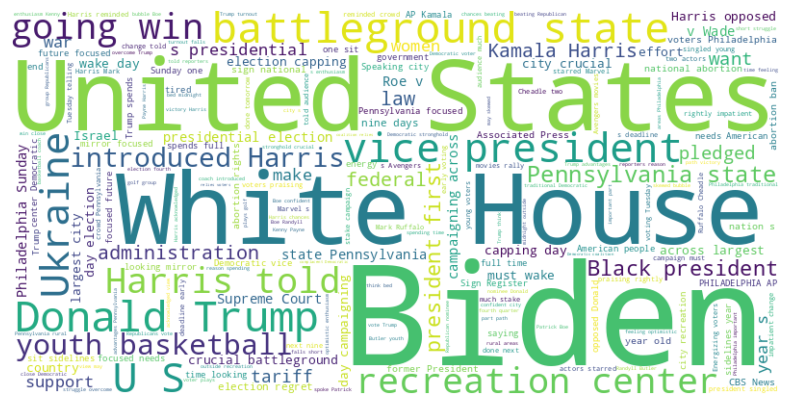

--------------------------------------------------


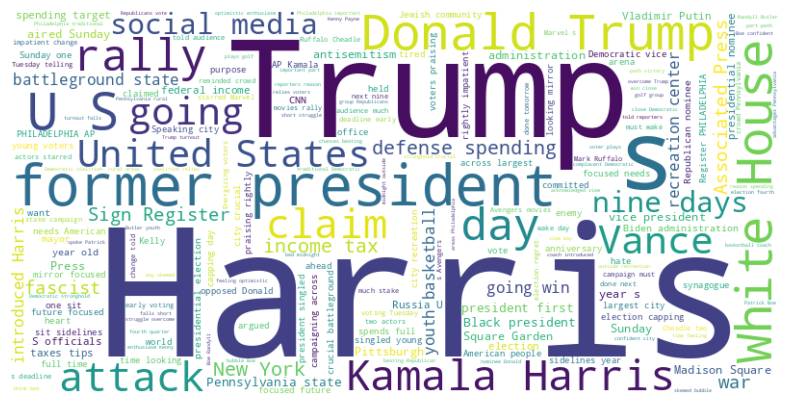

--------------------------------------------------
Word: Biden, Frequency: 1.0
Word: United States, Frequency: 0.9473684210526315
Word: White House, Frequency: 0.9473684210526315
Word: battleground state, Frequency: 0.8421052631578947
Word: Donald Trump, Frequency: 0.8421052631578947
Word: vice president, Frequency: 0.8421052631578947
Word: U S, Frequency: 0.8421052631578947
Word: Ukraine, Frequency: 0.7894736842105263
Word: recreation center, Frequency: 0.7368421052631579
Word: Harris told, Frequency: 0.7368421052631579
Word: going win, Frequency: 0.7368421052631579
Word: youth basketball, Frequency: 0.7368421052631579
Word: introduced Harris, Frequency: 0.7368421052631579
Word: Pennsylvania state, Frequency: 0.7368421052631579
Word: Black president, Frequency: 0.7368421052631579
Word: president first, Frequency: 0.7368421052631579
Word: law, Frequency: 0.631578947368421
Word: federal, Frequency: 0.631578947368421
Word: administration, Frequency: 0.631578947368421
Word: Kamala Harris,

In [11]:
wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")
